# Final Articles

There are 20 articles and 21 conference papers that made it into the review.

In [1]:
import pandas as pd
import numpy as np
import itertools
from collections import defaultdict


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/Scopus/matplotlibrc'

In [3]:
df=pd.read_csv('Data/Final_41 - Protocol.csv')
df.drop(df[df.eliminate == 1].index, inplace=True)

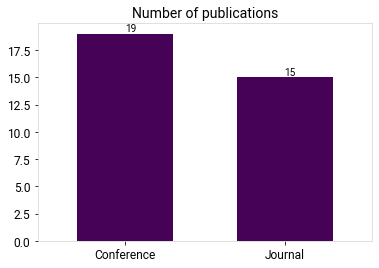

In [4]:
fig, ax = plt.subplots()
docType = pd.value_counts(df['Doc type'].values, sort=True)

df['Doc type'].value_counts().plot(kind='bar', width= 0.6, title="Number of publications")

type_of_publication = ["Conference", "Journal"]

ax.set_xticklabels(type_of_publication, minor=False, rotation=0) 

for index,data in enumerate(docType.values):
    ax.text(x=index , y = data+0.2 , s=f"{data}")
    
plt.savefig('doctype.jpg',  bbox_inches='tight')

In [5]:
list(df['Doc type'].value_counts())

[19, 15]

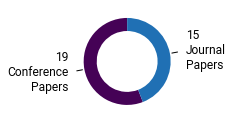

In [6]:
fig, ax = plt.subplots(figsize=(5, 2), subplot_kw=dict(aspect="equal"))

data = list(df['Doc type'].value_counts())
recipe = [str(data[0])+"\nConference\nPapers",str(data[1])+"\nJournal\nPapers"]



wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment,fontsize=12, **kw)

# ax.set_title("Number of publications")

plt.savefig("images/num_pub.svg", format="svg",  bbox_inches='tight')

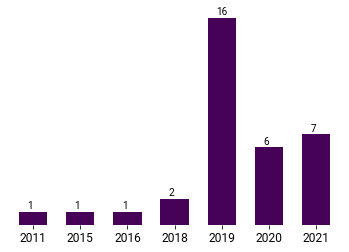

In [7]:
fig, ax = plt.subplots()
yearpublished = pd.value_counts(df['Year'].values).sort_index()

#, title="Number of articles published per year
yearpublished.plot(kind='bar', width= 0.6)
plt.box(False)
ax.set_yticks([])
plt.xticks(rotation=0) 

for index,data in enumerate(yearpublished.values):
    ax.text(x=index-0.12 , y = data+0.2 , s=f"{data}")
    
plt.savefig('images/pub_year.svg', format="svg",  bbox_inches='tight')

In [8]:
df['Business Use Case'].value_counts()

Text classification                                     6
Question answering                                      6
Sentiment analysis                                      5
KG Completion / link prediction                         2
Textual reasoning                                       2
Annotation                                              1
Fact verification                                       1
Topic modeling / categorization                         1
Cause-effect Identification                             1
Translation                                             1
Question answering,\ninformation extraction             1
Text classification\nKG Completion / link prediction    1
Decision making                                         1
Dialog system                                           1
Relation extraction                                     1
Information extraction                                  1
Image captioning                                        1
Text summariza

In [9]:
use_case_count = df['Business Use Case'].value_counts()
use_case_count['KG Completion / link prediction']+=use_case_count['Text classification\nKG Completion / link prediction']
use_case_count['Text classification']+=use_case_count['Text classification\nKG Completion / link prediction']
use_case_count['Question answering']+=use_case_count['Question answering,\ninformation extraction']
use_case_count['Information extraction']+=use_case_count['Question answering,\ninformation extraction']
use_case_count.pop('Text classification\nKG Completion / link prediction')
use_case_count.pop('Question answering,\ninformation extraction')

use_case_count = use_case_count.sort_values(ascending=False)


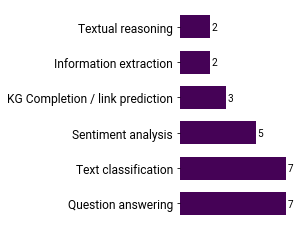

In [10]:
fig, ax = plt.subplots(figsize=(2,4))
plt.box(False)
plt.xticks([])

# plt.subplot(1, 2, 1) # row 1, col 2 index 1


use_case_count[:6].plot(kind='barh',width=.65)

for i, v in enumerate(use_case_count[:6].values):
    ax.text(v+0.1, i-.1 , str(v))

    

plt.savefig('images/biz_use_case.svg',  format="svg",  bbox_inches='tight')

In [11]:
df['Technical Application'].value_counts()

classification                24
generative                     5
inference                      3
similarity                     1
classification,\ninference     1
Name: Technical Application, dtype: int64

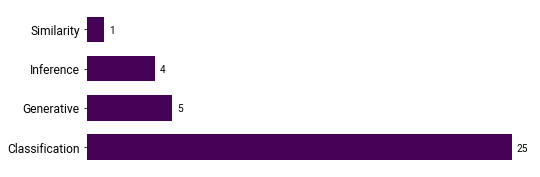

In [12]:
fig, ax = plt.subplots(figsize=(8,3))

app_value_counts = df['Technical Application'].value_counts()
app_value_counts['inference']+=app_value_counts['classification,\ninference']
app_value_counts['classification']+=app_value_counts['classification,\ninference']
app_value_counts.pop('classification,\ninference')

avc = pd.Series(dtype='float64')
for k in app_value_counts.keys():
    avc[k.capitalize()] = app_value_counts[k]

avc.plot(kind='barh', width=.65)
plt.box(False)
plt.xticks([])
for i, v in enumerate(avc.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('images/techApplication.svg',  format="svg",   bbox_inches='tight')

###Not used 
plt.hist(df['Year'],rwidth=0.9)
plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.show()

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


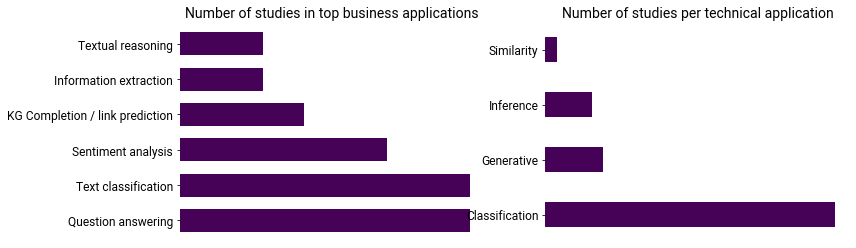

In [13]:
fig, ax = plt.subplots(figsize=(12,4))


plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.box(False)
plt.xticks([])
use_case_count[:6].plot(kind='barh',width=.65,title = "Number of studies in top business applications")

for i, v in enumerate(use_case_count[:6].values):
    ax.text(v+0.1, i-.1 , str(v))

plt.subplot(1, 2, 2) # index 2   
avc = pd.Series()
for k in app_value_counts.keys():
    avc[k.capitalize()] = app_value_counts[k]
avc.plot(kind='barh', width=.45,title="Number of studies per technical application")
plt.box(False)
plt.xticks([])
for i, v in enumerate(avc.values):
    ax.text(v+0.3, i-.1 , str(v))


plt.savefig('images/combined.svg',  format="svg",  bbox_inches='tight')

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


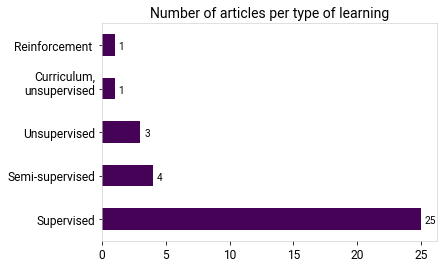

In [14]:
fig, ax = plt.subplots()
type_of_learning = df['Type of Learning'].value_counts()

tol = pd.Series()

for k in type_of_learning.keys():
    tol[k.capitalize()] = type_of_learning[k]

tol.plot(kind='barh', title="Number of articles per type of learning")

for i, v in enumerate(tol.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('typeoflearning.svg',  format="svg",  bbox_inches='tight')

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


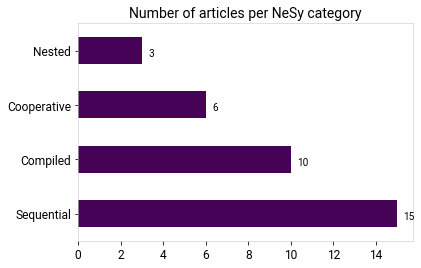

In [15]:
fig, ax = plt.subplots()
nesy_value_counts = df['NeSy Category'].value_counts()

nvc = pd.Series()

for k in nesy_value_counts.keys():
    nvc[k.capitalize()] = nesy_value_counts[k]

nvc.plot(kind='barh', title="Number of articles per NeSy category")

for i, v in enumerate(nvc.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('nesy category.svg',  format="svg",  bbox_inches='tight')

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0, flags=flags)


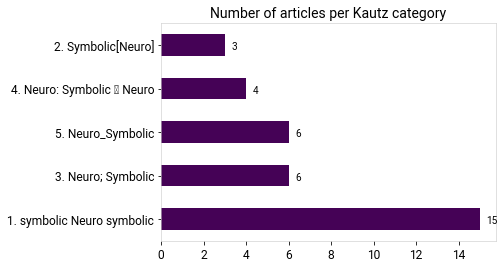

In [16]:
fig, ax = plt.subplots()

kautzCount = pd.value_counts(df['Kautz category'].values, sort=True)

df['Kautz category'].value_counts().plot(kind='barh', title="Number of articles per Kautz category")
for i, v in enumerate(kautzCount.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('Kautz category.svg',  format="svg",   bbox_inches='tight')

In [17]:
#df['Technical Application'].value_counts().plot(kind='barh', title="Number of articles per technical application")#

In [18]:
#nesy_value_counts['compiled']+=nesy_value_counts['compiled']
#nesy_value_counts.pop('compiled')
#nesy_value_counts['cooperative']+=nesy_value_counts['cooperative']
#nesy_value_counts['sequential']+=nesy_value_counts['sequential']
#nesy_value_counts['nested']+=nesy_value_counts['nested']

In [19]:
df['Symbolic terms'].unique()

array(['deduction,\ndependency parsing,\nrule based',
       'semantic enrichment', 'first order logic (FOL)',
       'first order logic (FOL),\nknowledge graph (KG)', 'sememe',
       'rule based,\nsemantic enrichment',
       'symbolic learner,\nsymbolic representations,\nConceptNet KG',
       'logic',
       'statistical relational learning (SLR),\nfuzzy logic,\nfirst order logic (FOL),\ntransductive learning,\ngrounding,\npropositionalization,\nsemantic enrichment',
       'first order logic (FOL),\nHuffman tree',
       'semantic enrichment,\ndependency parsing',
       'commonsense knowledge,\ngraph representation',
       'knowledge graph (KG)',
       'Sequencial decision making,\npredicate logic,\nrelational logic,\nrule based,\nrule induction,\ncognitive linguistics',
       'fuzzy logic,\nfuzzy neural network (FNN),\nlogical connectives',
       'fuzzy logic,\nNeutrosophy', 'symbolic processing', 'semantic net',
       'fuzzy logic,\nfuzzy rules,\nmamdani fuzzy system (MFS)

In [20]:
df['Neural terms'].unique()

array(['recurrent neural network (RNN)', 'logic tensor network (LTN)',
       'graph neural network (GNN)', 'neural network (NN)', 'SVM',
       'SVM,\nneuroevolution (NE)',
       'recursive neural knowledge network (RNKN),\nrecursive neural network (RcNN)',
       'reinforcement learning (RL),\nMemory Network,\nneural network (NN)\n',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN),\ndeep belief network (DBN)',
       'transformer',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN)',
       'convolutional neural network (CNN),\nneural network (NN)',
       'convolutional neural network (CNN)',
       'attention network (Attn),\ngraph neural network (GNN)',
       'recurrent neural network (RNN),\nreinforcement learning (RL)',
       'recursive neural network (RcNN),\nTensor Product Representation (TPR)',
       'recurrent neural network (RNN),\nconvolutional neural network (CNN),\nattention network (Attn)',
       'Tensor Product 

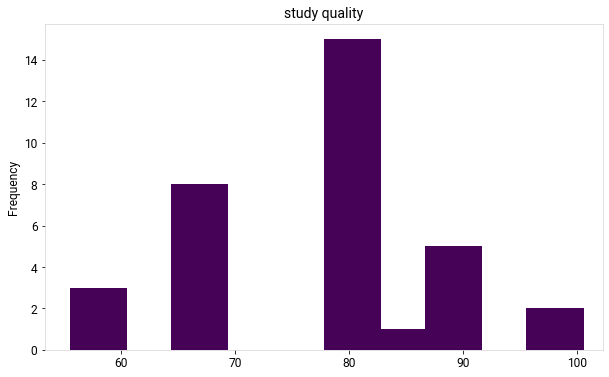

In [21]:

fig, ax = plt.subplots(figsize=(10,6))

df['Study Quality'].str.rstrip('%').astype('float').plot(kind='hist', width=5, title="study quality")

#ind = np.arange(len(docType.index))

#fig.suptitle('Document type', fontsize=18)
#plt.xlabel('Count', fontsize=14)
#plt.ylabel('Document', fontsize=14)


plt.savefig('study quality.jpg',  bbox_inches='tight')


In [22]:
df['Study Quality'].str.rstrip('%').astype('float').describe()

count     34.000000
mean      76.309412
std       11.051577
min       55.560000
25%       66.670000
50%       77.780000
75%       77.780000
max      100.000000
Name: Study Quality, dtype: float64

In [23]:
qq=pd.read_csv('Data/Final_41 - QQ.csv')
qq.drop(qq[qq.eleiminate == 1].index, inplace=True)

In [24]:
qq.columns

Index(['Unnamed: 0', 'KEY', 'Title', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'AVG', 'notes', 'questions', 'eleiminate'],
      dtype='object')

In [25]:
qqs=qq[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9']]

In [26]:
qqs=qqs[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].apply(pd.to_numeric)

In [27]:
qqs['sum'] = qqs['Q1']+ qqs['Q2']+qqs['Q3']+qqs['Q4']+qqs['Q5']+qqs['Q6']

In [28]:
qqs[qqs['sum']<6]

,Q1,Q2,Q3,Q4,Q5,Q6,sum
11,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,3.000000
13,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,5.000000
15,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,4.000000
19,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,5.000000
41,0.963415,0.97561,0.926829,0.914634,0.963415,0.926829,5.670732


In [29]:
# positively answer Q1-Q6
30/34

0.8823529411764706

In [30]:
# do not provide source code
1 - sum(qq['Q8'])/34

0.8185078909617647

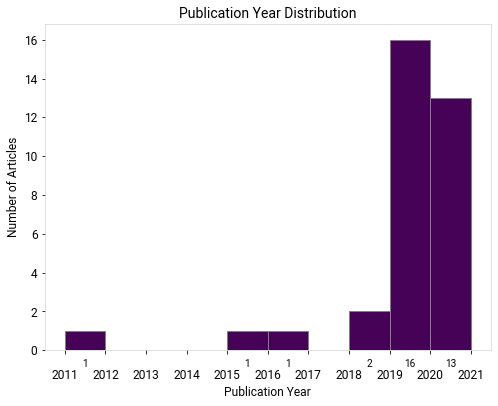

In [31]:
###Additional plots 
fig, ax = plt.subplots(figsize=(8,6))

counts, bins, patches = ax.hist(df['Year'], edgecolor='gray')

plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(df['Year'], [25, 75])

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    if(count):
        ax.annotate(int(count), xy=(x, 0.03), xycoords=('data', 'axes fraction'), xytext=(0, -18), textcoords='offset points', va='top', ha='center')

ax.tick_params(axis='x', which='major', pad=15)

    # Label the percentages
   # percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    #ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
     #   xytext=(0, -32), textcoords='offset points', va='top', ha='center')

In [32]:
df['Datasets'].value_counts()

Private                                                                                                                                                                               2
SoMoral                                                                                                                                                                               1
Spider                                                                                                                                                                                1
SemEval-2010                                                                                                                                                                          1
CORA                                                                                                                                                                                  1
AffectiveText, ISEAR, and Fairy Tales, Facebook posts                           

In [33]:
# symbolic terms
sym_terms=df['Symbolic terms']
sym_list=[[i.rstrip(',') for i in str(s).split("\n")] for s in sym_terms]

In [34]:
neu_terms=df['Neural terms']
neu_list=[[i.rstrip(',') for i in str(s).split("\n")] for s in neu_terms]

In [35]:
sym_set=set(sum(sym_list,[]))

In [36]:
neu_set=set(sum(neu_list,[]))

In [37]:
neu_set

{'',
 'Memory Network',
 'SVM',
 'Tensor Product Representation (TPR)',
 'attention network (Attn)',
 'convolutional neural network (CNN)',
 'deep belief network (DBN)',
 'graph neural network (GNN)',
 'logic tensor network (LTN)',
 'neural network (NN)',
 'neuroevolution (NE)',
 'recurrent neural network (RNN)',
 'recursive neural knowledge network (RNKN)',
 'recursive neural network (RcNN)',
 'reinforcement learning (RL)',
 'transformer'}

In [38]:
sym_set

{'ConceptNet KG',
 'Huffman tree',
 'Neutrosophy',
 'Sequencial decision making',
 'binding problem',
 'case based reasoning (CBR)',
 'cognitive linguistics',
 'commonsense knowledge',
 'constituency parsing',
 'deduction',
 'dependency parsing',
 'domain specific language (DSL)',
 'first order logic (FOL)',
 'fuzzy logic',
 'fuzzy neural network (FNN)',
 'fuzzy rules',
 'graph reasoning',
 'graph representation',
 'grounding',
 'knowledge graph (KG)',
 'logic',
 'logical connectives',
 'mamdani fuzzy system (MFS)',
 'ontology',
 'predicate logic',
 'program synthesis',
 'propositionalization',
 'relational logic',
 'rule based',
 'rule induction',
 'semantic enrichment',
 'semantic net',
 'semantic parsing',
 'sememe',
 'statistical relational learning (SLR)',
 'symbolic learner',
 'symbolic node embedding',
 'symbolic processing',
 'symbolic representations',
 'transductive learning'}

In [39]:
tup_dict=defaultdict(int)
for i in range(len(sym_list)):
    lists = list(itertools.product(sym_list[i],neu_list[i]))
    
    for j in lists:
        tup_dict[j]+=1


In [40]:
tup_dict

defaultdict(int,
            {('deduction', 'recurrent neural network (RNN)'): 1,
             ('dependency parsing', 'recurrent neural network (RNN)'): 1,
             ('rule based', 'recurrent neural network (RNN)'): 3,
             ('semantic enrichment', 'recurrent neural network (RNN)'): 3,
             ('first order logic (FOL)', 'recurrent neural network (RNN)'): 1,
             ('first order logic (FOL)', 'logic tensor network (LTN)'): 1,
             ('knowledge graph (KG)', 'logic tensor network (LTN)'): 1,
             ('semantic enrichment', 'graph neural network (GNN)'): 1,
             ('sememe', 'neural network (NN)'): 1,
             ('rule based', 'SVM'): 2,
             ('semantic enrichment', 'SVM'): 3,
             ('symbolic learner', 'SVM'): 1,
             ('symbolic learner', 'neuroevolution (NE)'): 1,
             ('symbolic representations', 'SVM'): 1,
             ('symbolic representations', 'neuroevolution (NE)'): 1,
             ('ConceptNet KG', 'SVM'): 1

In [41]:
d=defaultdict(dict)

for i in sym_set:
    inner_dict=defaultdict(dict)
    for j in neu_set:
        inner_dict[j]=tup_dict[(i,j)]
    d[i]=inner_dict
    
assd=pd.DataFrame(d)

In [42]:
assd

,logic,knowledge graph (KG),symbolic representations,domain specific language (DSL),dependency parsing,sememe,symbolic processing,case based reasoning (CBR),program synthesis,first order logic (FOL),...,constituency parsing,graph reasoning,grounding,propositionalization,binding problem,ontology,semantic enrichment,fuzzy logic,semantic net,predicate logic
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
neural network (NN),0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,2,0,1
SVM,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,3,1,0,0
deep belief network (DBN),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
attention network (Attn),0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
recurrent neural network (RNN),1,1,0,1,1,0,0,1,0,1,...,0,0,0,0,1,1,3,2,1,0
recursive neural network (RcNN),0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
reinforcement learning (RL),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
convolutional neural network (CNN),0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,2,1,0
neuroevolution (NE),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


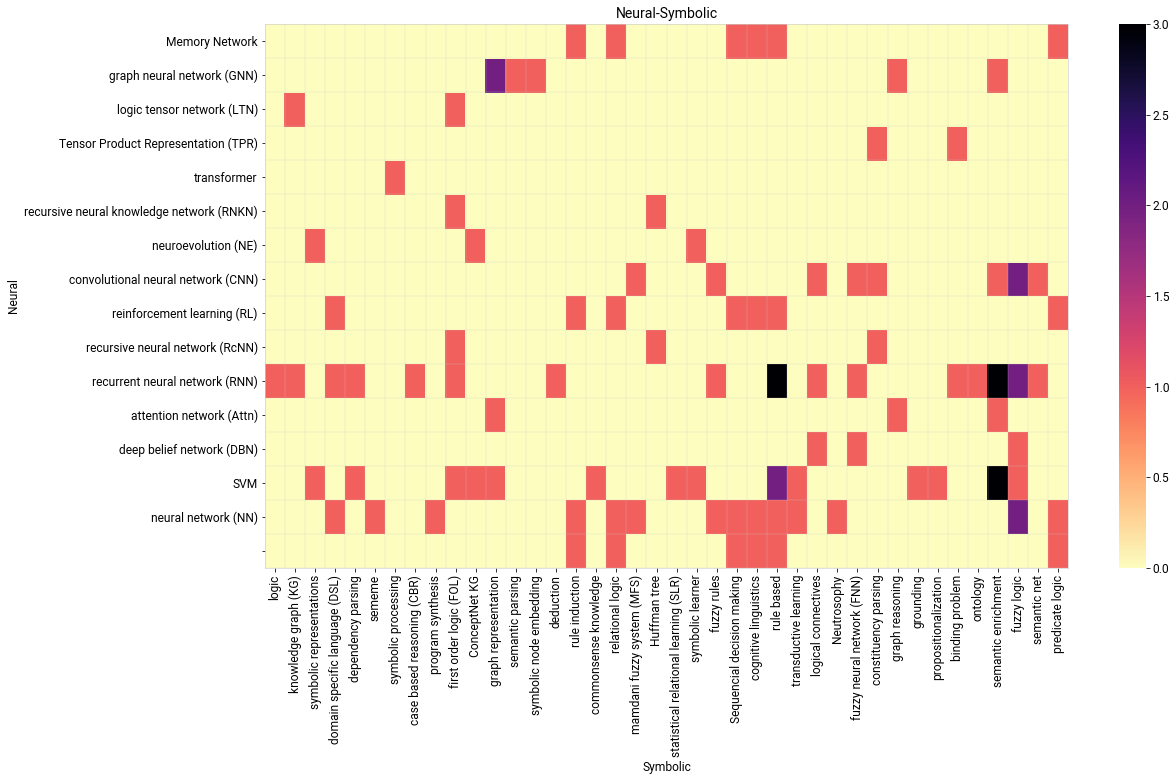

In [43]:
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()
fig, ax = plt.subplots(figsize=(18, 10))
color_map = plt.cm.get_cmap('magma')
reversed_color_map = color_map.reversed()

plt.hlines(y=np.arange(0, len(assd.index), 1), xmin=np.full(len(assd.index),0), xmax=np.full(len(assd.index),len(assd.columns)), color="#cccccc", linewidth=.25)
plt.vlines(x=np.arange(0, len(assd.columns), 1), ymin=np.full(len(assd.columns),0), ymax=np.full(len(assd.columns),len(assd.index)), color="#cccccc",linewidth=.25)
plt.yticks(np.arange(0.5, len(assd.index), 1), assd.index)
plt.xticks(np.arange(0.5, len(assd.columns), 1), assd.columns, rotation=90)
plt.ylabel("Neural")
plt.xlabel("Symbolic")
plt.title("Neural-Symbolic")

graph=plt.pcolor(assd, cmap=reversed_color_map)
cb = fig.colorbar(graph)
# cb.set_label('Support', rotation=0, va='bottom')
cb.outline.set_visible(False)
plt.show()

The two studies missing a DOI:
* 2-s2.0-85106687657
* 2-s2.0-85105153943

Scopus search which makes references(25)scopus.csv:
<pre>
DOI ("10.1007/978-3-030-48279-4_55" OR "10.1016/j.neunet.2016.09.001"  OR  "10.1108/IJWIS-11-2020-0067"  OR  "10.1007/s10994-021-05968-x"  OR 
"10.1016/j.eswa.2016.01.007"  OR "10.1016/j.neucom.2020.12.040"  OR  "10.1007/s10462-010-9188-4"  OR  "10.1016/j.patrec.2019.04.024"  OR  
"10.1016/j.neucom.2021.02.021"  OR "10.1109/ACCESS.2020.2972751"  OR  "10.1016/j.neunet.2018.06.012"  OR  "10.1016/j.artmed.2019.101772"  OR 
"10.1007/978-3-030-61609-0_51"  OR "10.1109/ACCESS.2019.2948081"  OR  "10.1109/TASLP.2021.3082295"  OR  "10.1109/ACCESS.2020.3019586"  OR  
"10.1016/j.artint.2015.08.011"  OR "10.1007/978-3-030-82147-0_34"  OR  "10.1016/j.neucom.2017.10.010"  OR  "10.1109/ACCESS.2021.3053917"  OR
"10.1007/s13218-019-00601-5"  OR "10.1007/s12065-019-00301-x"  OR  "10.1145/3453483.3454047" OR "10.1016/j.neunet.2012.02.013" OR
"10.1007/s11042-019-08125-8")  

OR  EID ( "2-s2.0-85106687657"  OR  "2-s2.0-85105153943" ) 
</pre>